# Traffic Light Classifier - Gaspard Shen

## Project: Build a Traffic Light Classifier

In this project, we use the XXX to do the traffic light classifier for the simulater image.

### Step1: Load the Data

In [2]:
# all the import 
import numpy as np
import matplotlib.pyplot as plt
import random
import glob
import cv2
import os
# Visualizations will be shown in the notebook.
%matplotlib inline

Num of the Red samples: 402


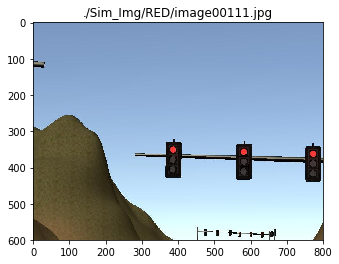

In [50]:
red_imglist = glob.glob('./Sim_Img/RED/*.jpg')
print('Num of the Red samples:', len(red_imglist))

idx = random.randint(0, len(red_imglist))
red_img = cv2.imread(red_imglist[idx])
plt.title(red_imglist[idx])
plt.imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB))

Num of the Green samples: 388
Num of the Yellow samples: 109
Num of the None samples: 108


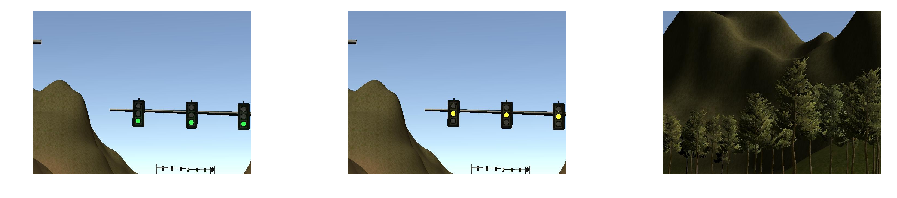

In [51]:
green_imglist = glob.glob('./Sim_Img/GREEN/*.jpg')
yellow_imglist = glob.glob('./Sim_Img/YELLOW/*.jpg')
none_imglist = glob.glob('./Sim_Img/NONE/*.jpg')

print('Num of the Green samples:', len(green_imglist))
print('Num of the Yellow samples:', len(yellow_imglist))
print('Num of the None samples:', len(none_imglist))

fig, axs = plt.subplots(1, 3, figsize=(16,3))

idx = random.randint(0, len(green_imglist))
green_img = cv2.imread(green_imglist[idx])
axs[0].axis('off')
axs[0].imshow(cv2.cvtColor(green_img, cv2.COLOR_BGR2RGB))

idx = random.randint(0, len(yellow_imglist))
yellow_img = cv2.imread(yellow_imglist[idx])
axs[1].axis('off')
axs[1].imshow(cv2.cvtColor(yellow_img, cv2.COLOR_BGR2RGB))

idx = random.randint(0, len(none_imglist))
none_img = cv2.imread(none_imglist[idx])
axs[2].axis('off')
axs[2].imshow(cv2.cvtColor(none_img, cv2.COLOR_BGR2RGB))


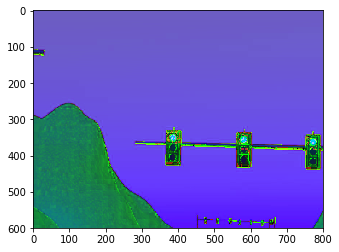

In [52]:
plt.imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2HSV))

In [72]:
from enum import Enum
class TrafficLight(Enum):
    RED = 0
    YELLOW = 1
    GREEN = 2
    UNKNOWN = 4

RED_MIN1 = np.array([0, 100, 100],np.uint8)
RED_MAX1 = np.array([10, 255, 255],np.uint8)        

RED_MIN2 = np.array([160, 100, 100],np.uint8)
RED_MAX2 = np.array([179, 255, 255],np.uint8)

YELLOW_MIN = np.array([40.0/360*255, 100, 100],np.uint8)
YELLOW_MAX = np.array([66.0/360*255, 255, 255],np.uint8)

GREEN_MIN = np.array([90.0/360*255, 100, 100],np.uint8)
GREEN_MAX = np.array([140.0/360*255, 255, 255],np.uint8)

def TrafficLightDetection(img):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    frame_threshed1 = cv2.inRange(hsv_img, RED_MIN1, RED_MAX1)
    frame_threshed2 = cv2.inRange(hsv_img, RED_MIN2, RED_MAX2)
    red_threshed = cv2.countNonZero(frame_threshed1) + cv2.countNonZero(frame_threshed2)
    if red_threshed > 50:
        return TrafficLight.RED
    
    frame_threshed = cv2.inRange(hsv_img, YELLOW_MIN, YELLOW_MAX)
    yellow_threshed = cv2.countNonZero(frame_threshed)
    if yellow_threshed > 50:
        return TrafficLight.YELLOW

    frame_threshed = cv2.inRange(hsv_img, GREEN_MIN, GREEN_MAX)
    green_threshed = cv2.countNonZero(frame_threshed)
    if green_threshed > 50:
        return TrafficLight.GREEN
    
    print('TrafficLight UNKNOWN Threshed red, yellow, green', red_threshed, yellow_threshed, green_threshed)
    print(red_threshed)
    return TrafficLight.UNKNOWN

In [73]:
for i in range(len(red_imglist)):
    img = cv2.imread(red_imglist[i])
    if TrafficLightDetection(img) != TrafficLight.RED:
        print('Check Fail for img', red_imglist[i])

TrafficLight UNKNOWN Threshed red, yellow, green 50 0 0
50
Check Fail for img ./Sim_Img/RED/image00392.jpg


In [67]:
for i in range(len(green_imglist)):
    img = cv2.imread(green_imglist[i])
    if TrafficLightDetection(img) != TrafficLight.GREEN:
        print('Check Green Light Fail at img:', green_imglist[i])

for i in range(len(yellow_imglist)):
    img = cv2.imread(yellow_imglist[i])
    if TrafficLightDetection(img) != TrafficLight.YELLOW:
        print('Check Yellow Light Fail at img', yellow_imglist[i])

for i in range(len(none_imglist)):
    img = cv2.imread(none_imglist[i])
    if TrafficLightDetection(img) != TrafficLight.UNKNOWN:
        print('Check None Fail at img', none_imglist[i])

Check Fail for img ./Sim_Img/GREEN/image00277.jpg
Check Fail for img ./Sim_Img/GREEN/image00263.jpg
Check Fail for img ./Sim_Img/GREEN/image00061.jpg
Check Fail for img ./Sim_Img/GREEN/image00049.jpg
Check Fail for img ./Sim_Img/GREEN/image00048.jpg
Check Fail for img ./Sim_Img/GREEN/image00060.jpg
Check Fail for img ./Sim_Img/GREEN/image00262.jpg
Check Fail for img ./Sim_Img/GREEN/image00276.jpg
Check Fail for img ./Sim_Img/GREEN/image00260.jpg
Check Fail for img ./Sim_Img/GREEN/image00274.jpg
Check Fail for img ./Sim_Img/GREEN/image00062.jpg
Check Fail for img ./Sim_Img/GREEN/image00063.jpg
Check Fail for img ./Sim_Img/GREEN/image00275.jpg
Check Fail for img ./Sim_Img/GREEN/image00261.jpg
Check Fail for img ./Sim_Img/GREEN/image00259.jpg
Check Fail for img ./Sim_Img/GREEN/image00265.jpg
Check Fail for img ./Sim_Img/GREEN/image00271.jpg
Check Fail for img ./Sim_Img/GREEN/image00270.jpg
Check Fail for img ./Sim_Img/GREEN/image00264.jpg
Check Fail for img ./Sim_Img/GREEN/image00258.jpg


Check Fail for img ./Sim_Img/NONE/image00033.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 1 4 1
TrafficLight UNKNOWN Threshed red, yellow, green 0 0 0
TrafficLight UNKNOWN Threshed red, yellow, green 0 0 0
Check Fail for img ./Sim_Img/NONE/image00040.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 0 0 0
TrafficLight UNKNOWN Threshed red, yellow, green 0 0 0
Check Fail for img ./Sim_Img/NONE/image00041.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 0 0 0
Check Fail for img ./Sim_Img/NONE/image00082.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 0 4 1
Check Fail for img ./Sim_Img/NONE/image00080.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 2 2 2
Check Fail for img ./Sim_Img/NONE/image00043.jpg
TrafficLight UNKNOWN Threshed red, yellow, green 0 0 0
TrafficLight UNKNOWN Threshed red, yellow, green 0 0 0
TrafficLight UNKNOWN Threshed red, yellow, green 0 0 0
TrafficLight UNKNOWN Threshed red, yellow, green 0 4 5
TrafficLight UNKNOWN Threshed red, yellow, gre

In [16]:
# use for copy the xml and jpg file to training
xml_list = glob.glob('./Site_Img/*.xml')
print('Num of the xml files:', len(xml_list))

jpg_list = []
for xml in xml_list:
    jpg = xml.split('.')[1]
    jpg_list.append(jpg + '.jpg')


Num of the xml files: 52


In [22]:
from shutil import copyfile

for xml in xml_list:    
    xml_file = xml.split('/')[-1]
    copyfile(xml, './train/'+xml_file)

In [27]:
for jpg in jpg_list:
    jpg_file = jpg.split('/')[-1]
    jpg = '.' + jpg
    copyfile(jpg, './train/'+jpg_file)